In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [2]:
# NBA Data Files
games = "J_Resources/J_games.csv"
games_details = "J_Resources/J_games_details.csv"
players = "J_Resources/J_players.csv"
ranking = "J_Resources/J_ranking.csv"
teams = "J_Resources/J_teams.csv"

In [3]:
# Read the data from games dataset
games_df = pd.read_csv(games)
print(games_df.shape)
pd.set_option('display.max_columns',50)
games_df.head()

(26651, 21)


,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2022-12-22,22200477,Final,1610612740,1610612759,2022,1610612740,126.0,0.484,0.926,0.382,25.0,46.0,1610612759,117.0,0.478,0.815,0.321,23.0,44.0,1
1,2022-12-22,22200478,Final,1610612762,1610612764,2022,1610612762,120.0,0.488,0.952,0.457,16.0,40.0,1610612764,112.0,0.561,0.765,0.333,20.0,37.0,1
2,2022-12-21,22200466,Final,1610612739,1610612749,2022,1610612739,114.0,0.482,0.786,0.313,22.0,37.0,1610612749,106.0,0.470,0.682,0.433,20.0,46.0,1
3,2022-12-21,22200467,Final,1610612755,1610612765,2022,1610612755,113.0,0.441,0.909,0.297,27.0,49.0,1610612765,93.0,0.392,0.735,0.261,15.0,46.0,1
4,2022-12-21,22200468,Final,1610612737,1610612741,2022,1610612737,108.0,0.429,1.000,0.378,22.0,47.0,1610612741,110.0,0.500,0.773,0.292,20.0,47.0,0


In [4]:
games_details_df = pd.read_csv(games_details)
print(games_details_df.shape)
games_details_df


(668628, 29)


/var/folders/0f/sxdh3l91563bdc1l7xymspvc0000gn/T/ipykernel_90515/2173366820.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  games_details_df = pd.read_csv(games_details)


,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22200477,1610612759,SAS,San Antonio,1629641,Romeo Langford,Romeo,F,NaN,18:06,1.0,1.0,1.000,0.0,0.0,0.000,0.0,0.0,0.000,1.0,1.0,2.0,0.0,1.0,0.0,2.0,5.0,2.0,-2.0
1,22200477,1610612759,SAS,San Antonio,1631110,Jeremy Sochan,Jeremy,F,NaN,31:01,7.0,14.0,0.500,2.0,4.0,0.500,7.0,10.0,0.700,6.0,3.0,9.0,6.0,1.0,0.0,2.0,1.0,23.0,-14.0
2,22200477,1610612759,SAS,San Antonio,1627751,Jakob Poeltl,Jakob,C,NaN,21:42,6.0,9.0,0.667,0.0,0.0,0.000,1.0,1.0,1.000,1.0,3.0,4.0,1.0,1.0,0.0,2.0,4.0,13.0,-4.0
3,22200477,1610612759,SAS,San Antonio,1630170,Devin Vassell,Devin,G,NaN,30:20,4.0,13.0,0.308,1.0,6.0,0.167,1.0,1.0,1.000,0.0,9.0,9.0,5.0,3.0,0.0,2.0,1.0,10.0,-18.0
4,22200477,1610612759,SAS,San Antonio,1630200,Tre Jones,Tre,G,NaN,27:44,7.0,12.0,0.583,1.0,3.0,0.333,4.0,4.0,1.000,0.0,2.0,2.0,3.0,0.0,0.0,2.0,2.0,19.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668623,11200005,1610612743,DEN,Denver,202706,Jordan Hamilton,NaN,NaN,NaN,19,4.0,9.0,0.444,3.0,6.0,0.500,6.0,7.0,0.857,0.0,2.0,2.0,0.0,2.0,0.0,1.0,3.0,17.0,NaN
668624,11200005,1610612743,DEN,Denver,202702,Kenneth Faried,NaN,NaN,NaN,23,7.0,11.0,0.636,0.0,0.0,0.000,4.0,4.0,1.000,1.0,0.0,1.0,1.0,1.0,0.0,3.0,3.0,18.0,NaN
668625,11200005,1610612743,DEN,Denver,201585,Kosta Koufos,NaN,NaN,NaN,15,3.0,7.0,0.429,0.0,0.0,0.000,0.0,0.0,0.000,3.0,5.0,8.0,0.0,1.0,0.0,0.0,3.0,6.0,NaN
668626,11200005,1610612743,DEN,Denver,202389,Timofey Mozgov,NaN,NaN,NaN,19,1.0,1.0,1.000,0.0,0.0,0.000,0.0,2.0,0.000,1.0,2.0,3.0,1.0,0.0,0.0,4.0,2.0,2.0,NaN


In [5]:
# Read the data from games_details dataset
games_details_df = pd.read_csv(games_details)
print(games_details_df.shape)
games_details_df.head()


# Group by 'PLAYER_NAME' and count the occurrences
games_played = games_details_df['PLAYER_NAME'].value_counts().reset_index(name="Game_Count")
games_played = games_played.rename(columns={"index": "PLAYER_NAME"})

# Calculate total blocks (BLK) and total steals (STL) for each player
total_blocks = games_details_df.groupby('PLAYER_NAME')['BLK'].sum().reset_index(name="Total_Blocks")
total_steals = games_details_df.groupby('PLAYER_NAME')['STL'].sum().reset_index(name="Total_Steals")
blocks_and_steals_std = games_details_df.groupby('PLAYER_NAME').agg({'BLK': "std", 'STL': "std"}).reset_index().rename(columns={'BLK': 'BLK_STD', 'STL':'STL_STD'})



# Merge the dataframes on 'PLAYER_NAME'
combined_stats = pd.merge(games_played, total_blocks, on='PLAYER_NAME', how='left')
combined_stats = pd.merge(combined_stats, total_steals, on='PLAYER_NAME', how='left')
combined_stats = pd.merge(combined_stats, blocks_and_steals_std, on='PLAYER_NAME', how='left')
combined_stats['Total_Blocks_And_Steals'] = combined_stats['Total_Blocks'] + combined_stats['Total_Steals']
combined_stats['Average_Blocks_Per_Game'] = combined_stats['Total_Blocks'] / combined_stats['Game_Count']
combined_stats['Average_Steals_Per_Game'] = combined_stats['Total_Steals'] / combined_stats['Game_Count']
combined_stats['Average_Steals_And_Blocks_Per_Game'] = combined_stats['Total_Blocks_And_Steals'] / combined_stats['Game_Count']




# Display the resulting dataframe
combined_stats





/var/folders/0f/sxdh3l91563bdc1l7xymspvc0000gn/T/ipykernel_90515/3303658857.py:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  games_details_df = pd.read_csv(games_details)


(668628, 29)


,PLAYER_NAME,Game_Count,Total_Blocks,Total_Steals,BLK_STD,STL_STD,Total_Blocks_And_Steals,Average_Blocks_Per_Game,Average_Steals_Per_Game,Average_Steals_And_Blocks_Per_Game
0,LeBron James,1795,1346.0,2726.0,0.915417,1.270169,4072.0,0.749861,1.518663,2.268524
1,Udonis Haslem,1720,307.0,508.0,0.537144,0.753342,815.0,0.178488,0.295349,0.473837
2,Andre Iguodala,1560,749.0,2103.0,0.742047,1.261509,2852.0,0.480128,1.348077,1.828205
3,Dwight Howard,1541,2624.0,1259.0,1.594774,0.990820,3883.0,1.702790,0.817002,2.519792
4,Kyle Korver,1534,484.0,933.0,0.634909,0.882981,1417.0,0.315515,0.608214,0.923729
...,...,...,...,...,...,...,...,...,...,...
2659,Nate Williams,1,0.0,0.0,NaN,NaN,0.0,0.000000,0.000000,0.000000
2660,Anwar Ferguson,1,1.0,0.0,NaN,NaN,1.0,1.000000,0.000000,1.000000
2661,Jon Horford,1,0.0,0.0,NaN,NaN,0.0,0.000000,0.000000,0.000000
2662,Michael Holyfield,1,0.0,0.0,NaN,NaN,0.0,0.000000,0.000000,0.000000


In [6]:
# # Read the data from players dataset
# players_df = pd.read_csv(players)
# print(players_df.shape)
# players_df.head()

In [7]:
# # Read the data from ranking dataset
# ranking_df = pd.read_csv(ranking)
# print(ranking_df.shape)
# ranking_df.head()

In [8]:
# # Read the data from teams dataset
# teams_df = pd.read_csv(teams)
# print(teams_df.shape)
# teams_df.head()

In [9]:
# # Create a new dataframe and merge both game datasets
# game_data_merge_df = pd.merge(games_details_df, games_df, on='GAME_ID')
# print(game_data_merge_df.shape)
# pd.set_option('display.max_columns',50)
# display(game_data_merge_df)

In [10]:
# # Create a new dataframe and merge the team and rankings data sets
# team_and_rankings_df = pd.merge(teams_df, ranking_df, on='TEAM_ID')
# print(team_and_rankings_df.shape)
# pd.set_option('display.max_columns',50)
# display(team_and_rankings_df)

In [11]:
# Work off what I'm already doing 

Expanded_Details = combined_stats
Expanded_Details

,PLAYER_NAME,Game_Count,Total_Blocks,Total_Steals,BLK_STD,STL_STD,Total_Blocks_And_Steals,Average_Blocks_Per_Game,Average_Steals_Per_Game,Average_Steals_And_Blocks_Per_Game
0,LeBron James,1795,1346.0,2726.0,0.915417,1.270169,4072.0,0.749861,1.518663,2.268524
1,Udonis Haslem,1720,307.0,508.0,0.537144,0.753342,815.0,0.178488,0.295349,0.473837
2,Andre Iguodala,1560,749.0,2103.0,0.742047,1.261509,2852.0,0.480128,1.348077,1.828205
3,Dwight Howard,1541,2624.0,1259.0,1.594774,0.990820,3883.0,1.702790,0.817002,2.519792
4,Kyle Korver,1534,484.0,933.0,0.634909,0.882981,1417.0,0.315515,0.608214,0.923729
...,...,...,...,...,...,...,...,...,...,...
2659,Nate Williams,1,0.0,0.0,NaN,NaN,0.0,0.000000,0.000000,0.000000
2660,Anwar Ferguson,1,1.0,0.0,NaN,NaN,1.0,1.000000,0.000000,1.000000
2661,Jon Horford,1,0.0,0.0,NaN,NaN,0.0,0.000000,0.000000,0.000000
2662,Michael Holyfield,1,0.0,0.0,NaN,NaN,0.0,0.000000,0.000000,0.000000


In [12]:
# Function to filter players based on the specified minimum appearance count
def filter_players(df, min_appearances=82):
    # Filter players based on the specified minimum appearances
    filtered_players = games_played[games_played['Game_Count'] >= min_appearances]

    # Merge the filtered players back to the original dataframe
    filtered_df = df.merge(filtered_players[['PLAYER_NAME']], on="PLAYER_NAME", how="inner")

    return filtered_df

# Apply the function to exclude players with less than 82 appearances on Expanded_Details dataframe
filtered_expanded_details = filter_players(Expanded_Details, min_appearances=82)

# Display the resulting dataframe
filtered_expanded_details


,PLAYER_NAME,Game_Count,Total_Blocks,Total_Steals,BLK_STD,STL_STD,Total_Blocks_And_Steals,Average_Blocks_Per_Game,Average_Steals_Per_Game,Average_Steals_And_Blocks_Per_Game
0,LeBron James,1795,1346.0,2726.0,0.915417,1.270169,4072.0,0.749861,1.518663,2.268524
1,Udonis Haslem,1720,307.0,508.0,0.537144,0.753342,815.0,0.178488,0.295349,0.473837
2,Andre Iguodala,1560,749.0,2103.0,0.742047,1.261509,2852.0,0.480128,1.348077,1.828205
3,Dwight Howard,1541,2624.0,1259.0,1.594774,0.990820,3883.0,1.702790,0.817002,2.519792
4,Kyle Korver,1534,484.0,933.0,0.634909,0.882981,1417.0,0.315515,0.608214,0.923729
...,...,...,...,...,...,...,...,...,...,...
1441,Anthony Goldwire,82,0.0,23.0,0.000000,0.729760,23.0,0.000000,0.280488,0.280488
1442,Kim English,82,4.0,18.0,0.282057,0.609818,22.0,0.048780,0.219512,0.268293
1443,Joel Bolomboy,82,4.0,4.0,0.367946,0.464095,8.0,0.048780,0.048780,0.097561
1444,Justin Champagnie,82,9.0,16.0,0.453116,0.706081,25.0,0.109756,0.195122,0.304878


In [13]:
# Sort the dataframe based on 'Average_Blocks_Per_Game' in descending order
sorted_by_blocks = filtered_expanded_details.sort_values(by='Average_Blocks_Per_Game', ascending=False)

# Select the top 50 players
top_50_players_by_blocks = sorted_by_blocks.head(50)

# Display the resulting dataframe
top_50_players_by_blocks


,PLAYER_NAME,Game_Count,Total_Blocks,Total_Steals,BLK_STD,STL_STD,Total_Blocks_And_Steals,Average_Blocks_Per_Game,Average_Steals_Per_Game,Average_Steals_And_Blocks_Per_Game
459,Myles Turner,549,1160.0,355.0,1.593698,0.907522,1515.0,2.112933,0.646630,2.759563
234,Marcus Camby,801,1664.0,688.0,2.011080,1.088517,2352.0,2.077403,0.858926,2.936330
220,Anthony Davis,826,1632.0,979.0,1.695988,1.194720,2611.0,1.975787,1.185230,3.161017
248,Rudy Gobert,788,1544.0,499.0,1.567990,0.851175,2043.0,1.959391,0.633249,2.592640
797,Alonzo Mourning,298,571.0,55.0,1.755232,0.452748,626.0,1.916107,0.184564,2.100671
833,Mitchell Robinson,281,538.0,227.0,1.571097,1.013206,765.0,1.914591,0.807829,2.722420
44,Tim Duncan,1210,2286.0,808.0,1.521870,0.843633,3094.0,1.889256,0.667769,2.557025
332,Hassan Whiteside,677,1262.0,299.0,1.829256,0.741736,1561.0,1.864106,0.441654,2.305761
53,Serge Ibaka,1180,2126.0,449.0,1.760159,0.638196,2575.0,1.801695,0.380508,2.182203
555,Yao Ming,471,848.0,178.0,1.460786,0.659118,1026.0,1.800425,0.377919,2.178344


In [14]:
# Sort the dataframe based on 'Average_Steals_Per_Game' in descending order
sorted_by_steals = filtered_expanded_details.sort_values(by='Average_Steals_Per_Game', ascending=False)

# Select the top 50 players
top_50_players_by_steals = sorted_by_steals.head(50)

# Display the resulting dataframe
top_50_players_by_steals

,PLAYER_NAME,Game_Count,Total_Blocks,Total_Steals,BLK_STD,STL_STD,Total_Blocks_And_Steals,Average_Blocks_Per_Game,Average_Steals_Per_Game,Average_Steals_And_Blocks_Per_Game
5,Chris Paul,1520,211.0,2911.0,0.404387,1.490613,3122.0,0.138816,1.915132,2.053947
172,Jason Kidd,886,281.0,1534.0,0.589985,1.403629,1815.0,0.317156,1.731377,2.048533
258,Ricky Rubio,766,95.0,1298.0,0.359044,1.473843,1393.0,0.124021,1.694517,1.818538
482,Allen Iverson,528,61.0,881.0,0.351792,1.466550,942.0,0.115530,1.668561,1.784091
350,Baron Davis,661,257.0,1096.0,0.724367,1.429759,1353.0,0.388805,1.658094,2.046899
132,Paul George,960,412.0,1549.0,0.723833,1.399112,1961.0,0.429167,1.613542,2.042708
229,Kawhi Leonard,811,472.0,1305.0,0.873876,1.329607,1777.0,0.581998,1.609125,2.191122
33,Russell Westbrook,1264,375.0,1993.0,0.585393,1.335212,2368.0,0.296677,1.576741,1.873418
688,Ben Simmons,361,255.0,568.0,0.877893,1.321085,823.0,0.706371,1.573407,2.279778
79,Stephen Curry,1099,259.0,1728.0,0.517220,1.317732,1987.0,0.235669,1.572338,1.808007


In [15]:
from scipy.stats import ttest_ind

# Extract the 'Average_Blocks_Per_Game' values from the top_50_players_by_blocks dataframe
std_blocks_top_50 = top_50_players_by_blocks['Average_Blocks_Per_Game'].dropna()

# Extract the 'Average_Blocks_Per_Game' values from the filtered_expanded_details dataframe
std_blocks_filtered = filtered_expanded_details['Average_Blocks_Per_Game'].dropna()

# Perform the T-test
t_stat, p_value = ttest_ind(std_blocks_top_50, std_blocks_filtered, equal_var=False)

# Display the results
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in standard deviation.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in standard deviation.")




T-statistic: 32.34117091161321
P-value: 2.650445452097839e-37
Reject the null hypothesis: There is a significant difference in standard deviation.


In [16]:
from scipy.stats import ttest_ind

# Extract the 'Average_Steals_Per_Game' values from the top_50_players_by_blocks dataframe
std_steals_top_50 = top_50_players_by_steals['Average_Steals_Per_Game'].dropna()

# Extract the 'Average_Steals_Per_Game' values from the filtered_expanded_details dataframe
std_steals_filtered = filtered_expanded_details['Average_Steals_Per_Game'].dropna()

# Perform the T-test
t_stat, p_value = ttest_ind(std_steals_top_50, std_steals_filtered, equal_var=False)

# Display the results
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in standard deviation.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in standard deviation.")

T-statistic: 42.973780114954124
P-value: 5.479311290129507e-51
Reject the null hypothesis: There is a significant difference in standard deviation.


The r-value is: 0.8623664653984808


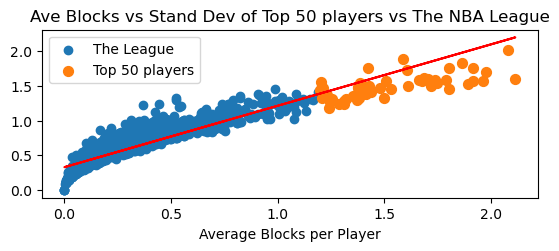

In [17]:
import matplotlib.pyplot as plt
import scipy.stats as st

plt.subplot(2, 1, 1)

# Use straight quotes (' ') instead of smart quotes (‘ ’) for column names
plt.scatter(filtered_expanded_details['Average_Blocks_Per_Game'], filtered_expanded_details['BLK_STD'], label="The League")
plt.scatter(top_50_players_by_blocks['Average_Blocks_Per_Game'], top_50_players_by_blocks['BLK_STD'], label="Top 50 players", s=50)

plt.legend()
plt.title("Ave Blocks vs Stand Dev of Top 50 players vs The NBA League")
plt.xlabel("Average Blocks per Player")

# Extract x and y values for linear regression
x_values = filtered_expanded_details['Average_Blocks_Per_Game']
y_values = filtered_expanded_details['BLK_STD']

# Calculate linear regression values
slope, intercept, rvalue, pvalue, stderr = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

# Plot linear regression line
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (2, 8), fontsize=15, color="red")

print(f"The r-value is: {rvalue**2}")
plt.show()



The r-value is: 0.8594005618731932


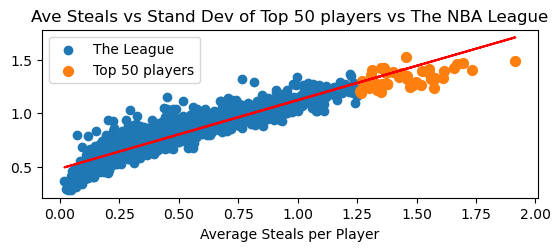

In [18]:
import matplotlib.pyplot as plt
import scipy.stats as st

plt.subplot(2, 1, 1)

# Use straight quotes (' ') instead of smart quotes (‘ ’) for column names
plt.scatter(filtered_expanded_details['Average_Steals_Per_Game'], filtered_expanded_details['STL_STD'], label="The League")
plt.scatter(top_50_players_by_steals['Average_Steals_Per_Game'], top_50_players_by_steals['STL_STD'], label="Top 50 players", s=50)

plt.legend()
plt.title("Ave Steals vs Stand Dev of Top 50 players vs The NBA League")
plt.xlabel("Average Steals per Player")

# Extract x and y values for linear regression
x_values = filtered_expanded_details['Average_Steals_Per_Game']
y_values = filtered_expanded_details['STL_STD']

# Calculate linear regression values
slope, intercept, rvalue, pvalue, stderr = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

# Plot linear regression line
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (2, 8), fontsize=15, color="red")

print(f"The r-value is: {rvalue**2}")
plt.show()


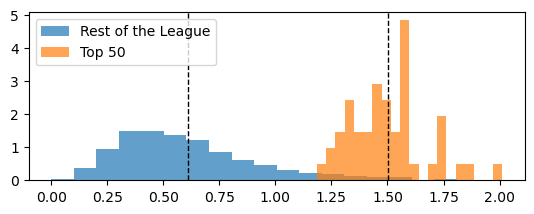

In [19]:
import matplotlib.pyplot as plt
import numpy as np  # Add this import for the 'mean' function

plt.subplot(2, 1, 2)

# Use straight quotes (' ') instead of smart quotes (” ”)
plt.hist(filtered_expanded_details['BLK_STD'], 20, density=True, alpha=0.7, label="Rest of the League")
plt.hist(top_50_players_by_blocks['BLK_STD'], 20, density=True, alpha=0.7, label="Top 50")

# Use single quotes (' ') for string values, and use 'dashed' without quotes
plt.axvline(filtered_expanded_details['BLK_STD'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(top_50_players_by_blocks['BLK_STD'].mean(), color='k', linestyle='dashed', linewidth=1)

plt.legend()




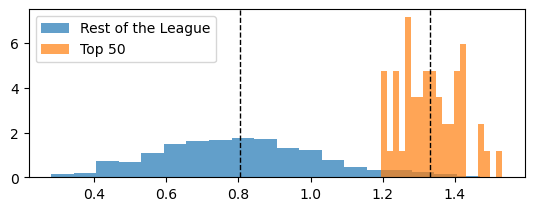

In [20]:
import matplotlib.pyplot as plt
import numpy as np  # Add this import for the 'mean' function

plt.subplot(2, 1, 2)

# Use straight quotes (' ') instead of smart quotes (” ”)
plt.hist(filtered_expanded_details['STL_STD'], 20, density=True, alpha=0.7, label="Rest of the League")
plt.hist(top_50_players_by_steals['STL_STD'], 20, density=True, alpha=0.7, label="Top 50")

# Use single quotes (' ') for string values, and use 'dashed' without quotes
plt.axvline(filtered_expanded_details['STL_STD'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(top_50_players_by_steals['STL_STD'].mean(), color='k', linestyle='dashed', linewidth=1)

plt.legend()